# Cloud Seeding

These data were collected in the summer of 1975 from an experiment to investigate the use of silver iodide in cloud seeding to increase rainfall. In the experiment, which was conducted in an area of Florida, 24 days were judged suitable for seeding on the basis that a measured
suitability criterion, denoted $S-Ne$, was not less than 1.5. On each day, the decision to seed was made randomly. The response variable $Y$
is the amount of rain (in cubic meters $\times 10^7$) that fell
in the target area for a 6 hour period on each suitable day. As well as $S - Ne$, the following explanatory variables were also recorded on each suitable day.

- $A$ = Action: an indicator of wheter seeding action occured (1 yes, 0 no)
- $T$ = Time: number of days after the first day of the experiment (June 1, 1975)
- $C$ = Echo covarage: the percentage cloud cover in the experimental area, measured using radar
- $P$ = Pre-wetness: the total rainfall in the target area 1 hour before seeding (in cubic meters $\times 10^7$)
- $E$ = Echo motion: an indicator showing wheter the radar echo was moving (1) or stationary (2)

The aim is to set up a model to investigate how $Y$ is related to
the explanatory variables. There are several difficulties; for instance,
the second data point seems untypical in several ways. The second data point will be highlighted
separately in histograms as the 'Outlier Point'.

This is the 70th data set from "A Handbook of Small Data Sets".

## 1. Data description

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
import numpy as np
import plotly.express as px
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

data = pd.read_csv('data.csv')

In [2]:
data

,A,T,S-Ne,C,P,E,Y
0,0,0,1.75,13.4,0.274,2,12.85
1,1,1,2.70,37.9,1.267,1,5.52
2,1,3,4.10,3.9,0.198,2,6.29
3,0,4,2.35,5.3,0.526,1,6.11
4,1,6,4.25,7.1,0.250,1,2.45
5,0,18,1.30,4.6,0.307,1,0.47
6,0,25,3.35,4.9,0.194,1,4.56
7,0,27,2.85,12.1,0.751,1,6.35
8,1,28,2.20,5.2,0.084,1,5.06
9,1,29,4.40,4.1,0.236,1,2.76


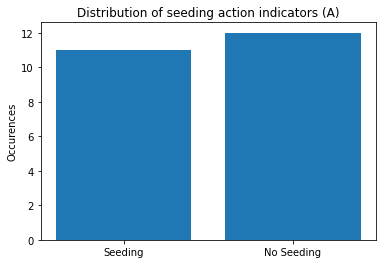

In [3]:
sizes = [data[data['A'] == 0].shape[0], data[data['A'] == 1].shape[0]]

fig, ax = plt.subplots()

ax.set_xticks([0, 1])
ax.set_xticklabels(['Seeding', 'No Seeding'])

ax.set_ylabel('Occurences')

plt.bar([0, 1], sizes)
plt.title("Distribution of seeding action indicators (A)")

plt.show()

The seeding action indicators are almost evenly distributed, as the data set contains 11 days where seeding occured and 12 days where it didn't.

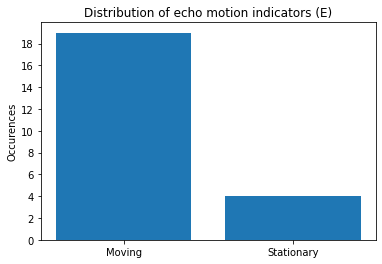

In [4]:
sizes = [data[data['E'] == 1].shape[0], data[data['E'] == 2].shape[0]]

fig, ax = plt.subplots()

ax.set_xticks([0, 1])
ax.set_xticklabels(['Moving', 'Stationary'])

ax.set_yticks(np.arange(0, max(sizes), 2))
ax.set_ylabel('Occurences')

plt.bar([0, 1], sizes)
plt.title("Distribution of echo motion indicators (E)")

plt.show()

Meanwhile, the echo motion indicators tell another story. It looks like the echo radar is usually moving, and it being stationary is more of an anomaly, since it 
acoounts for only 17% of data points.

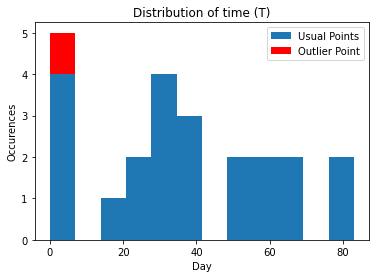

Time
Mean: 36.47826086956522
Std: 25.204381951661052
Value range: (0, 83)


In [5]:
fig, ax = plt.subplots()

plt.title('Distribution of time (T)')

plt.hist([data[data['T'] != 1]['T'], 
          data[data['T'] == 1]['T']],
         bins=12,
         stacked=True,
        color=('C0', 'r'))

ax.set_ylabel('Occurences')
ax.set_xlabel('Day')

ax.legend(['Usual Points', 'Outlier Point'])

plt.show()

print(f"Time",
      f"Mean: {data['T'].mean()}",
      f"Std: {data['T'].std()}",
      f"Value range: {data['T'].min(), data['T'].max()}",
      sep='\n')

The time data points are distributed evenly enough for our purpose, with a mean of 36.5 and a variance of 25.2, with data points ranging over 84 days.

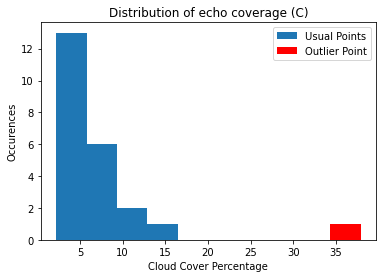

Stats with outlier
Mean: 7.2608695652173925
Std: 7.348329379119557

Stats without outlier
Mean: 5.868181818181818
Std: 3.136025140150136

Percentage of points with C<5%: 47.82608695652174%


In [6]:
fig, ax = plt.subplots()

plt.title('Distribution of echo coverage (C)')

plt.hist([data[data['T'] != 1]['C'], 
          data[data['T'] == 1]['C']],
         stacked=True, color=('C0', 'r'))

ax.set_ylabel('Occurences')
ax.set_xlabel('Cloud Cover Percentage')

ax.legend(['Usual Points', 'Outlier Point'])

plt.show()

print("Stats with outlier",
      f"Mean: {data['C'].mean()}",
      f"Std: {data['C'].std()}",
      sep='\n')
print()

print("Stats without outlier",
      f"Mean: {data[data['T'] != 1]['C'].mean()}",
      f"Std: {data[data['T'] != 1]['C'].std()}",
      sep='\n')
print()

print(f"Percentage of points with C<5%: {data[data['C'] <= 5].shape[0] / data.shape[0] * 100}%")

If we forget about the outlier data point, the echo coverage has a somewhat predictable distribution. As the coverage value is increasing, the less probable of occuring it is. For example, echo coverage under 5% accounts for around 48% of data points.

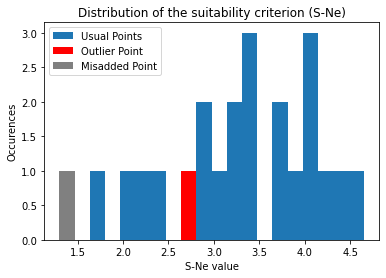


Suitability criterion (S-Ne)
Mean: 3.2373913043478266
Std: 0.8844989202486054
Value range: (1.3, 4.65)



In [7]:
fig, ax = plt.subplots()

plt.title('Distribution of the suitability criterion (S-Ne)')

plt.hist([data[(data['T'] != 1) & (data['S-Ne'] >= 1.5)]['S-Ne'], 
          data[(data['T'] == 1) & (data['S-Ne'] >= 1.5)]['S-Ne'],
          data[data['S-Ne'] < 1.5]['S-Ne']],
         stacked=True,
         bins=20,
         color=('C0', 'r', 'gray'))

ax.set_ylabel('Occurences')
ax.set_xlabel('S-Ne value')

ax.legend(['Usual Points', 'Outlier Point', 'Misadded Point'])

plt.show()

print()
print(f"Suitability criterion (S-Ne)",
      f"Mean: {data['S-Ne'].mean()}",
      f"Std: {data['S-Ne'].std()}",
      f"Value range: {data['S-Ne'].min(), data['S-Ne'].max()}",
      sep='\n')
print()

The data set was supposed data points where the suitability criterion was at least 1.5, but it contains a point with $S-Ne = 1.3$. Outside this fact, the suitability criterion seems pretty uniformly distributed, with a slight tendency around 3.5.

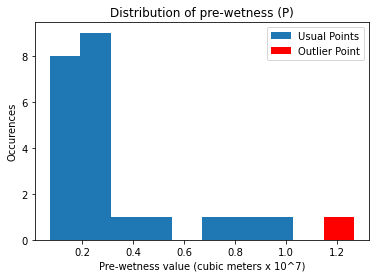



Mean: 0.3405217391304349
Std: 0.3120573766538946
Value range: (0.073, 1.267)

Percentage of points with P<0.5%: 78.26086956521739%


In [8]:
fig, ax = plt.subplots()

plt.title('Distribution of pre-wetness (P)')

plt.hist([data[data['T'] != 1]['P'], 
          data[data['T'] == 1]['P']],
         stacked=True,
         color=('C0', 'r'))

ax.set_ylabel('Occurences')
ax.set_xlabel('Pre-wetness value (cubic meters x 10^7)')

ax.legend(['Usual Points', 'Outlier Point'])

plt.show()

print()
print(f"",
      f"Mean: {data['P'].mean()}",
      f"Std: {data['P'].std()}",
      f"Value range: {data['P'].min(), data['P'].max()}",
      sep='\n')
print()

print(f"Percentage of points with P<0.5%: {data[data['P'] <= 0.5].shape[0] / data.shape[0] * 100}%")

Similarly to the echo coverage, as the pre-wetness value increases, it's less likely to occur. 78.2% of the points in the data set correspond to
a P value less than 0.5.

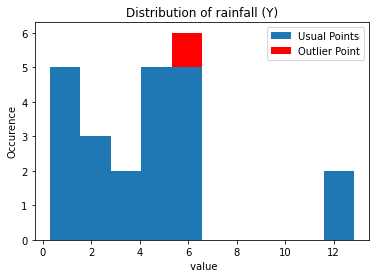


Amount of rain (in cubic meters ×10^7) that fell in the target area for a 6 hour period on each suitable day (Y)
Mean: 4.437391304347826
Std: 3.174320567805602
Value range: (0.28, 12.85)



In [9]:
fig,ax = plt.subplots()

plt.title('Distribution of rainfall (Y)')

plt.hist([data[data['T'] != 1]['Y'], 
          data[data['T'] == 1]['Y']],
         stacked=True,
         color=('C0', 'r'))

ax.set_ylabel('Occurence')
ax.set_xlabel(' value')

ax.legend(['Usual Points', 'Outlier Point'])

plt.show()

print()
print(f"Amount of rain (in cubic meters ×10^7) that fell in the target area for a 6 hour period on each suitable day (Y)",
      f"Mean: {data['Y'].mean()}",
      f"Std: {data['Y'].std()}",
      f"Value range: {data['Y'].min(), data['Y'].max()}",
      sep='\n')
print()

The Y-values seem almost evenly distributed in the interval (0, 7) with 2 data points with Y > 11.

## 2. Correlation

In [10]:
data.corr()

,A,T,S-Ne,C,P,E,Y
A,1.000000,-0.016734,0.111815,0.061397,-0.077360,-0.019968,0.066201
T,-0.016734,1.000000,0.408091,-0.361351,-0.331100,-0.143851,-0.522053
S-Ne,0.111815,0.408091,1.000000,-0.165789,-0.039848,-0.046353,-0.459571
C,0.061397,-0.361351,-0.165789,1.000000,0.660853,-0.016655,0.270118
P,-0.077360,-0.331100,-0.039848,0.660853,1.000000,-0.192091,0.166172
E,-0.019968,-0.143851,-0.046353,-0.016655,-0.192091,1.000000,0.387974
Y,0.066201,-0.522053,-0.459571,0.270118,0.166172,0.387974,1.000000


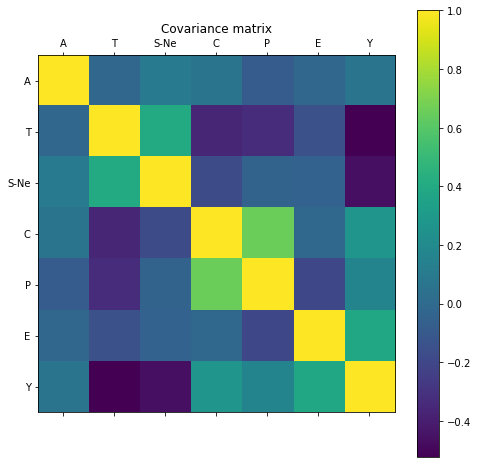

In [11]:
def plot_corr(df,size=8):
    f = plt.figure(figsize=(size, size))
    corr = df.corr()
    plt.matshow(corr, fignum=f.number)
    plt.colorbar()
    
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    plt.title("Covariance matrix")
    
plot_corr(data)

## 2.1 Removing the outlier point

There are a lot of meaningful covariances that can be worked with, but the outlier point seems to heavily skew the values. Below we can see a difference between the covariance matrices after excluding the outlier point.

In [12]:
diff = data.corr() - data.drop(1, axis=0).corr()

def style_negative(v, props=''):
    return props if v < 0 else None
diff = diff.style.set_caption("Covariance matrix difference")\
                 .applymap(style_negative, props='color:red;')\
                 .applymap(lambda v: 'opacity: 20%;' if (v < 0.1) and (v > -0.1) else None)
diff

,A,T,S-Ne,C,P,E,Y
A,0.000000,-0.066000,-0.031282,0.365523,0.203331,-0.019968,0.013934
T,-0.066000,0.000000,0.018584,-0.153595,-0.148471,0.039710,0.003948
S-Ne,-0.031282,0.018584,0.000000,-0.055921,-0.100556,0.013772,-0.004591
C,0.365523,-0.153595,-0.055921,0.000000,0.432473,-0.190792,-0.216995
P,0.203331,-0.148471,-0.100556,0.432473,0.000000,-0.022345,0.010880
E,-0.019968,0.039710,0.013772,-0.190792,-0.022345,0.000000,-0.010280
Y,0.013934,0.003948,-0.004591,-0.216995,0.010880,-0.010280,0.000000


For example, the outlier point has both a very high pre-wetness and echo coverage indicators relative to the other data points. Therefore, it makes the echo coverage and pre-wetness look much more correlated than they actually are.

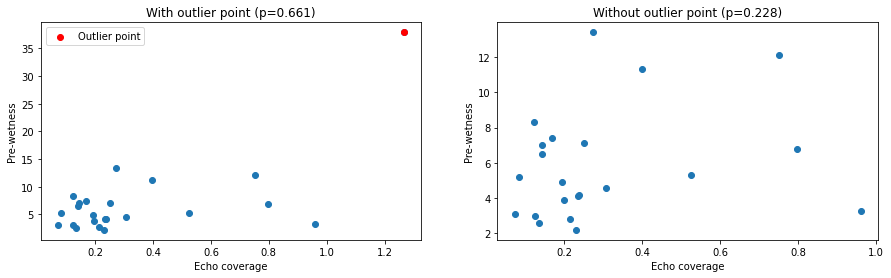

In [74]:
f = plt.figure(figsize=(15, 4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.scatter(data['P'], data['C'], label='_nolegend_')
ax1.scatter([data['P'][1]], [data['C'][1]], color='r')

ax1.legend(["Outlier point"])

ax2.scatter(data.drop(1, axis=0)['P'], data.drop(1, axis=0)['C'])

ax1.set_title("With outlier point (p={:.3f})".format(data.corr()['P']['C']))
ax2.set_title("Without outlier point (p={:.3f})".format(data.drop(1, axis=0).corr()['P']['C']))

ax1.set_xlabel("Echo coverage")
ax1.set_ylabel("Pre-wetness")

ax2.set_xlabel("Echo coverage")
ax2.set_ylabel("Pre-wetness")

plt.show()

Therefore, we'll exclude the outlier point from the analysis going forward.

In [16]:
dataWO = data.drop(1, axis=0)

dataWO.corr().style.applymap(lambda v: 'opacity: 20%;' if ((v < 0.2) and (v > -0.2)) or (v == 1) else None)

,A,T,S-Ne,C,P,E,Y
A,1.000000,0.049266,0.143097,-0.304126,-0.280692,-0.000000,0.052267
T,0.049266,1.000000,0.389507,-0.207756,-0.182628,-0.183561,-0.526001
S-Ne,0.143097,0.389507,1.000000,-0.109868,0.060708,-0.060125,-0.454980
C,-0.304126,-0.207756,-0.109868,1.000000,0.228380,0.174138,0.487113
P,-0.280692,-0.182628,0.060708,0.228380,1.000000,-0.169745,0.155292
E,-0.000000,-0.183561,-0.060125,0.174138,-0.169745,1.000000,0.398254
Y,0.052267,-0.526001,-0.454980,0.487113,0.155292,0.398254,1.000000


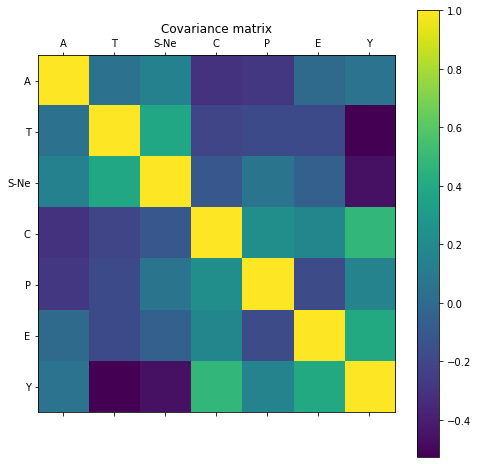

In [15]:
plot_corr(dataWO)

We'll continue by analysing the covariance between the explanatory variables and the response variable.

## 2.2 Echo motion is insignificant

The echo indicator seems to be somewhat correlated to the response variable, but this is a bit misleading since only 17\% percent of the data points have a stationary radar echo. We can't say much with so few stationary data points, but it looks like the echo motion does not really influence the amount of rain $Y$. As a result, the echo motion feature will be dropped going forward.

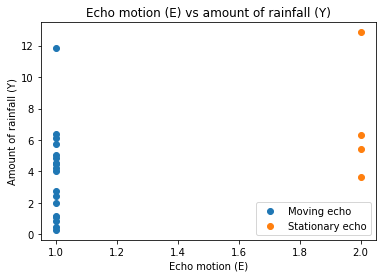

In [52]:
fig, ax = plt.subplots()

ax.scatter(dataWO[dataWO['E'] == 1]['E'], dataWO[dataWO['E'] == 1]['Y'])
ax.scatter(dataWO[dataWO['E'] == 2]['E'], dataWO[dataWO['E'] == 2]['Y'])
ax.legend(("Moving echo", "Stationary echo"))

ax.set_title("Echo motion (E) vs amount of rainfall (Y)")
ax.set_xlabel("Echo motion (E)")
ax.set_ylabel("Amount of rainfall (Y)")

plt.show()

In [86]:
dataWO = dataWO.drop('E', axis=1)

## 2.3 Action indicator

Text(0.5, 1.0, 'ASD')

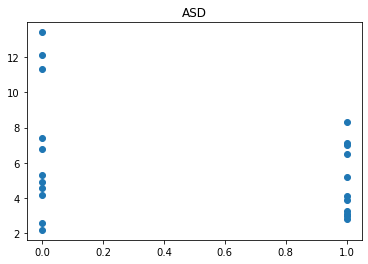

In [103]:
plt.scatter(dataWO['A'], dataWO['C'])

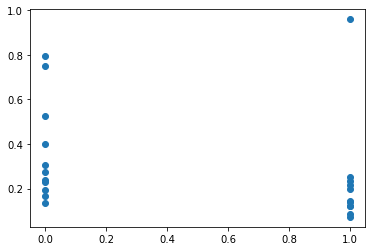

In [75]:
plt.scatter(dataWO['A'], dataWO['P'])

## 2.4 Time, Suitability Criterion and Cloud Coverage

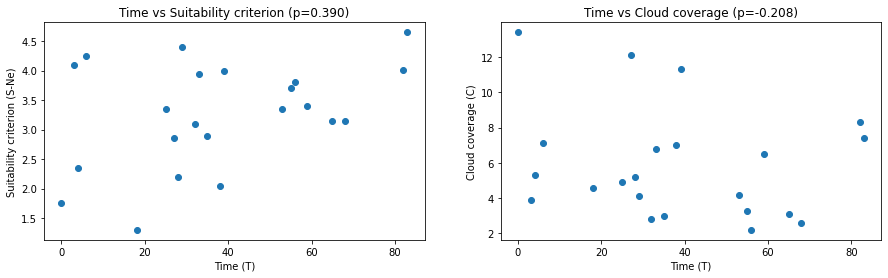

In [114]:
f = plt.figure(figsize=(15, 4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.scatter(dataWO['T'], dataWO['S-Ne'])
ax2.scatter(dataWO['T'], dataWO['C'])

ax1.set_title("Time vs Suitability criterion (p={:.3f})".format(dataWO.corr()['T']['S-Ne']))
ax2.set_title("Time vs Cloud coverage (p={:.3f})".format(dataWO.corr()['T']['C']))

ax1.set_xlabel("Time (T)")
ax1.set_ylabel("Suitability criterion (S-Ne)")

ax2.set_xlabel("Time (T)")
ax2.set_ylabel("Cloud coverage (C)")

plt.show()

# 3. Regression model

In [102]:
X = dataWO.drop('Y', axis=1)
Y = dataWO['Y']

reg = LinearRegression().fit(X, Y)

reg.score(X, Y)

0.5585849269259731